# Week 05: Visualization Techniques
**Course:** WMASDS04 - Introduction to Data Science with Python
<br>**Instructor:** Farhana Afrin, Department of Statistics, JU

**Outlines:**
- Qualitative Data Visualization
    - Pie Chart
    - Bar Chart
- Quantitative Data Visualization
    - Scatter Plot
    - Line Plot
    - Histogram
    - Box Plot
    - Violin Plot
    - Time Series Plot
    - Heatmap
    - Pairplot
    - distplot
    - catplot

#### Import required libraries and packages

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [2]:
# df = pd.read_csv('bmw.csv')

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# print(type(df))
# display(df.head())
# display(df.tail())
# df.info()
df.dtypes
# df.sample(5,random_state = 4)
# df.columns
# df.index
df.shape

(10781, 8)

In [4]:
print('Number of Rows = ', df.shape[0])
print('Number of Columns = ', df.shape[1])

Number of Rows =  10781
Number of Columns =  8


#### Checking for missing values

In [28]:
# df.info()
df.isnull().sum()
# df.notnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Count the number of unique values in columns

In [29]:
# df['model'].unique()
# df['transmission'].value_counts()
# df['fuelType'].value_counts()

In [7]:
# print(df['model'].unique())
# print(type(df['model'].unique()))
# len(df['model'].unique())

<class 'numpy.ndarray'>


24

## Pie chart

In [4]:
# df['transmission'].value_counts().plot.pie(autopct = '%.2f%%')

In [7]:
# df.info()
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:ylabel='day'>

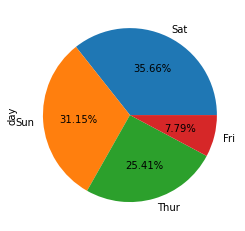

In [18]:
df['day'].value_counts().plot.pie(autopct = '%.2f%%')
# df['smoker'].value_counts().plot.pie()

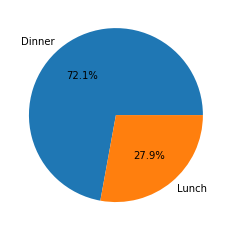

In [19]:
df['time'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.ylabel('')
plt.show()

In [10]:
type(df['transmission'].value_counts())

pandas.core.series.Series

## Bar Plot

- How to set a title, xlabel and ylabel of a plot?
- How to change the range of x and y axis?

<AxesSubplot:>

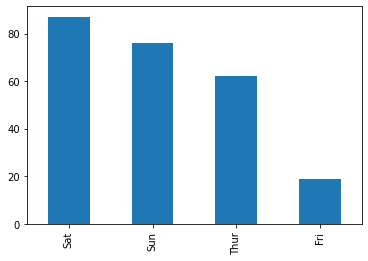

In [30]:
df['day'].value_counts().plot(kind = 'bar')

#### Find the percentage of unique values present in the 'day' column


In [31]:
print(df["day"].value_counts())

print(type(df["day"].value_counts()))

df_day = pd.DataFrame(df["day"].value_counts())

display(df_day.head())
print(df_day.index)
print(df_day.columns)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
<class 'pandas.core.series.Series'>


,day
Sat,87
Sun,76
Thur,62
Fri,19


CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
Index(['day'], dtype='object')


In [37]:
# df_day = pd.DataFrame(df['day'].value_counts())
df_day = df_day.reset_index() 
df_day = df_day.rename(columns = {'index':'day',
                                           'day':'no_of_customers'})
df_day['% of customer'] = (df_day['no_of_customers']/df.shape[0])*100

In [13]:
# df_fuelType['no_of_cars'].sum()
# df.shape[0]

In [38]:
df_day

,day,no_of_customers,% of customer
0,Sat,87,35.655738
1,Sun,76,31.147541
2,Thur,62,25.409836
3,Fri,19,7.786885


In [40]:
# df.info()

#### Barplot for the 'day' column

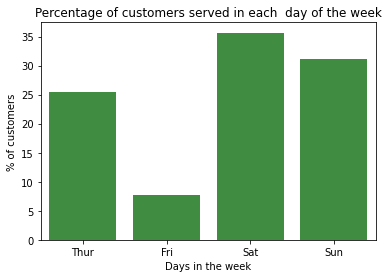

In [49]:
sns.barplot(x="day", 
            y="% of customer", 
            data=df_day, 
            color="green",
            alpha=0.8)

plt.xlabel("Days in the week")
plt.ylabel("% of customers")
plt.title("Percentage of customers served in each  day of the week")

plt.yticks(np.arange(0,36,5))

plt.show()

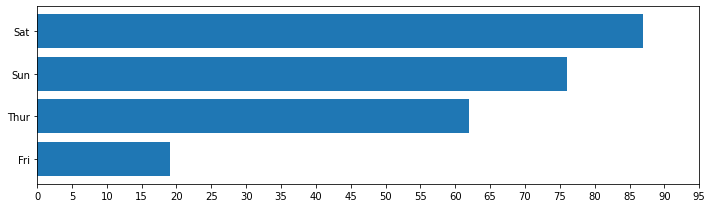

In [60]:
plt.figure(figsize = (10,3))
df_day = df_day.sort_values(by = ['no_of_customers'], ascending = True)
plt.barh(df_day['day'], df_day['no_of_customers'], height = 0.8, left = 0)
plt.xticks(np.arange(0,100, 5))
plt.tight_layout()
plt.show()

# plt.rcParams.update({'font.size': 16})

## Scatter Plot

#### Find the relation between the numerical variables

- Scatterplot of total_bill vs tip
- Scatterplot of size vs tip

In [61]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [62]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


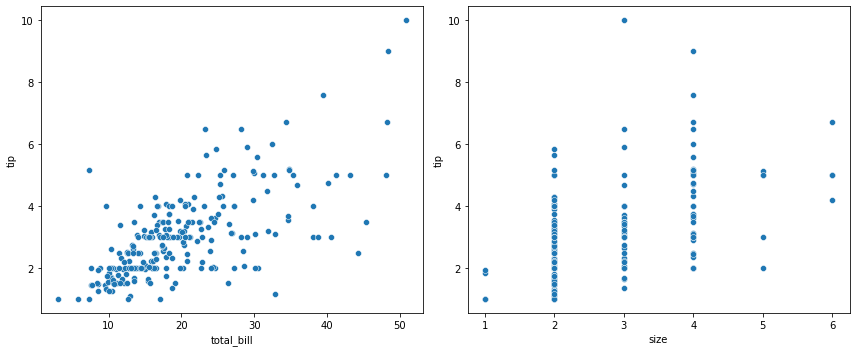

In [72]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="total_bill", y="tip", data=df)

plt.subplot(1, 2, 2)
sns.scatterplot(x="size", y="tip", data=df)

plt.tight_layout()
plt.show()

#### using the hue parameter

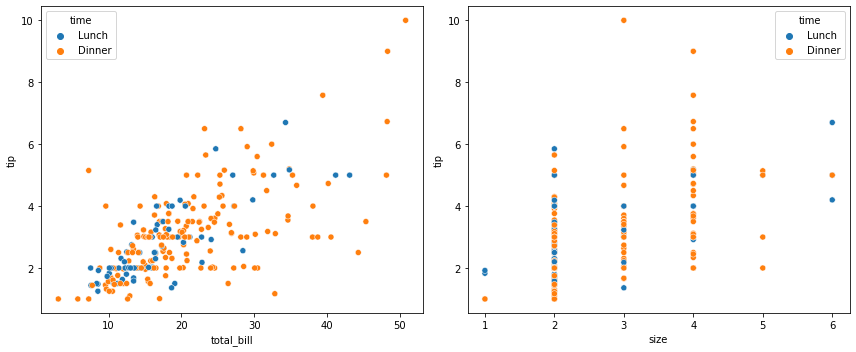

In [78]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="total_bill", y="tip", data=df, hue = 'time')

plt.subplot(1, 2, 2)
sns.scatterplot(x="size", y="tip", data=df, hue = 'time')

plt.tight_layout()
plt.show()

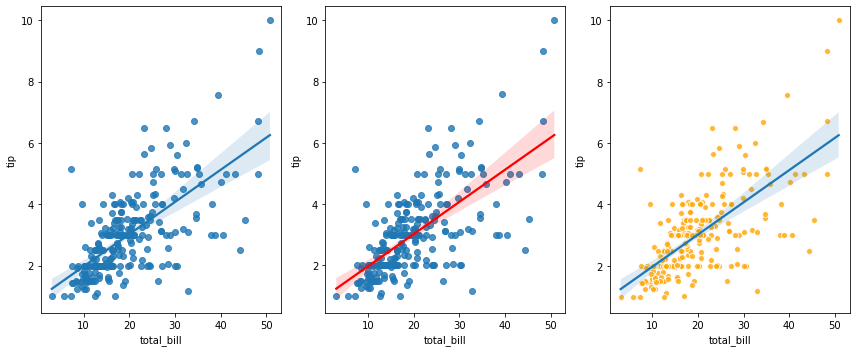

In [89]:
# Addding trend line
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
sns.regplot(x="total_bill", y="tip", data=df)

plt.subplot(1, 3, 2)
sns.regplot(x="total_bill", y="tip", data=df, line_kws = {"color":"red"})

plt.subplot(1,3, 3)
sns.regplot(x="total_bill", y="tip", data=df, scatter_kws={"color":"orange", "edgecolor":"white"})

plt.tight_layout()
plt.show()

### Pairplot

In [27]:
# # an example from the documentation
# penguins = sns.load_dataset("penguins")
# display(penguins.head())
# print(penguins.shape)
# # sns.pairplot(penguins)
# sns.pairplot(penguins, hue="species")
# plt.show()

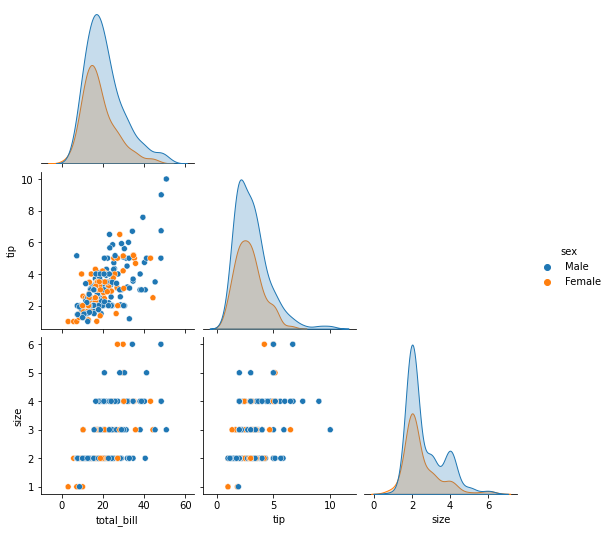

In [91]:
# sns.pairplot(df, corner=True)
sns.pairplot(df, corner=True, hue="sex")

## Heatmap

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### Assumptions:

- **Tips increases when total_bill increases** 
- **Tips increases when size increases** 

In [93]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

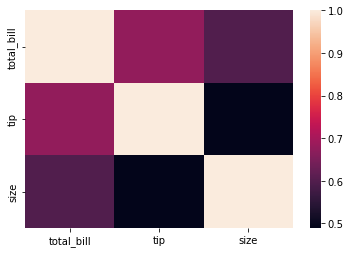

In [94]:
sns.heatmap(df.corr())

<AxesSubplot:>

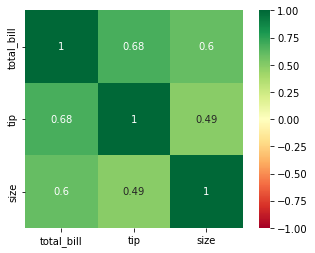

In [95]:
sns.heatmap(df.corr(), square=True, vmax=1.0, vmin=-1.0, cmap="RdYlGn", annot=True)

In [96]:
# Creating mask
correlation_matrix = df.corr()
display(correlation_matrix)

mask = np.zeros_like(correlation_matrix)
print(mask)

mask[np.triu_indices_from(mask)] = True
print(mask)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


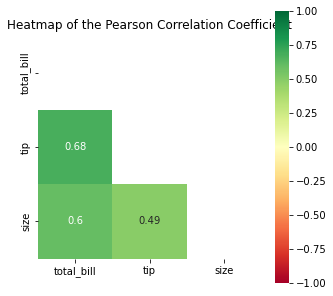

In [98]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, 
            square=True,
            vmax=1.0, vmin=-1.0,
            cmap="RdYlGn",
            annot=True,
            mask=mask)

plt.title("Heatmap of the Pearson Correlation Coefficient")
plt.show()

#### observations:

- **Tips increases when total_bill increases** True
- **Tips increases when size increases**  True

### Line Plot
- How to create a user defined function?
- How to draw the equation of a straight line?
- How to draw multiple line charts in the same figure?
- How to change the color, linestyle and marker of a figure?
- How to modify the legend of a figure?
- How to create Subplot?


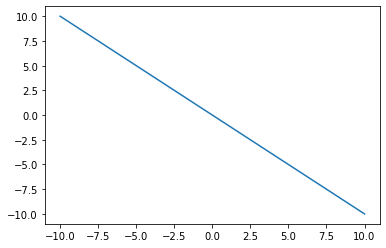

In [99]:
m = -1
c = 0
x = np.arange(-10,11,2)
y = m*x+c
plt.plot(x,y)

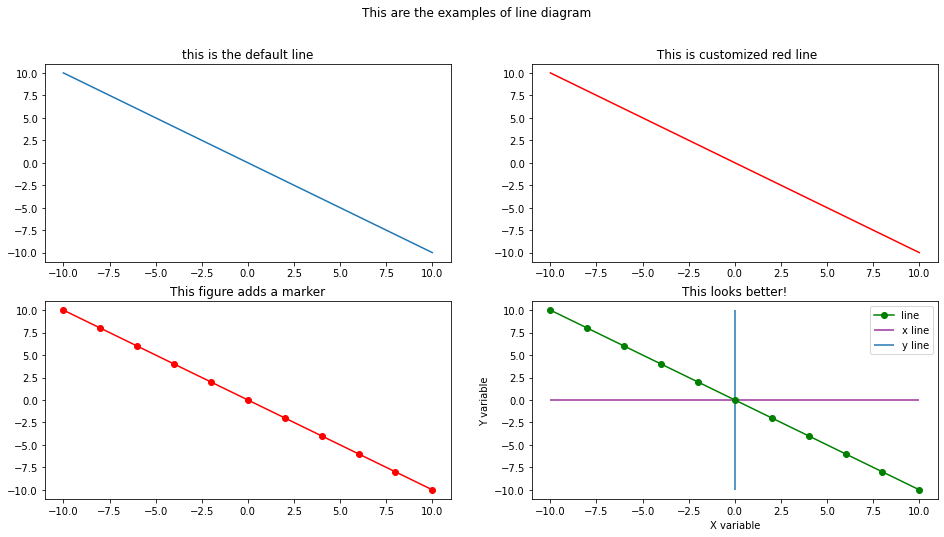

In [100]:
# Subplot with same dataset formated differently

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(x,y)
plt.title('this is the default line')

plt.subplot(2,2,2)
plt.plot(x,y, color = 'Red')
plt.title(' This is customized red line')

plt.subplot(2,2,3)
plt.plot(x,y, color = 'Red', marker = 'o')
plt.title('This figure adds a marker')

plt.subplot(2,2,4)
plt.plot(x,y, color = 'Green', marker = 'o')
plt.hlines(0,-10,10, color = 'Purple', alpha = .8)
plt.vlines(0,-10,10)
plt.xlabel('X variable')
plt.ylabel('Y variable')
plt.title('This looks better!')
plt.legend(['line', 'x line', 'y line'], loc = 'upper right')

plt.suptitle('This are the examples of line diagram')
plt.show()

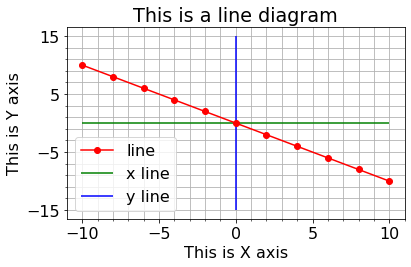

In [37]:
# Formating plot: linestyle, color, marker, title, label, gridlines, axes ticks, legend
m = -1
c = 0
x = np.arange(-10,11,2)
y = m*x+c

plt.figure(figsize = (6,4))
plt.plot(x,y, color = 'Red', marker = 'o')

plt.hlines(0, -10, 10, color="green", linestyles="-")
plt.vlines(0, -15, 15, color="blue", linestyles="-")

plt.xticks(np.arange(-10,11,5))
plt.yticks(np.arange(-15,16,10))
plt.minorticks_on()

plt.grid(True, which='both')
plt.legend(['line', 'x line', 'y line'], loc = 'lower left')

plt.xlabel("This is X axis")
plt.ylabel("This is Y axis")

plt.title('This is a line diagram')
plt.tight_layout()
plt.show()

In [101]:
# Creating multiple straight lines using function
def line(x, m, c):
    df = pd.DataFrame() #creating blank dataframe
    df['x'] = x         # add a column, x
    df['y'] = m*x+c
    return df
    

In [103]:
l1 = line(np.arange(-5,6,1), 1, 1)
l2 = line(np.arange(-5,6,1), -1, 1)
l3 = line(np.arange(-5,6,1), 1, -1)
l4 = line(np.arange(-5,6,1), -1, -1)
# l3

In [104]:
# Create a lineplot function
def lineplot(x,y, title, color):
    plt.plot(x,y,color = color, marker= '.')
    plt.hlines(0,-5,6, color = 'Black')
    plt.vlines(0, -5, 6, color = 'Black')
    plt.xticks(np.arange(-6, 7, 2))
    plt.yticks(np.arange(-6, 7, 2))
    plt.minorticks_on()
    plt.grid(True, which = 'both')
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title(title)

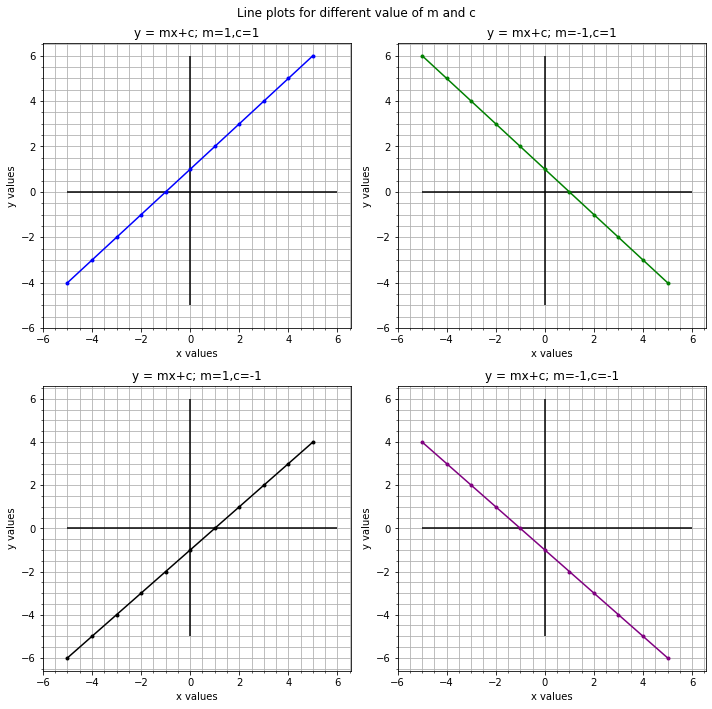

In [105]:
# Creating subplots
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
lineplot(l1['x'],l1['y'],'y = mx+c; m=1,c=1','blue')

plt.subplot(2,2,2)
lineplot(l2['x'],l2['y'],'y = mx+c; m=-1,c=1','green')

plt.subplot(2,2,3)
lineplot(l3['x'],l3['y'],'y = mx+c; m=1,c=-1','black')

plt.subplot(2,2,4)
lineplot(l4['x'],l4['y'],'y = mx+c; m=-1,c=-1','purple')

plt.suptitle('Line plots for different value of m and c')
plt.tight_layout()
plt.show()

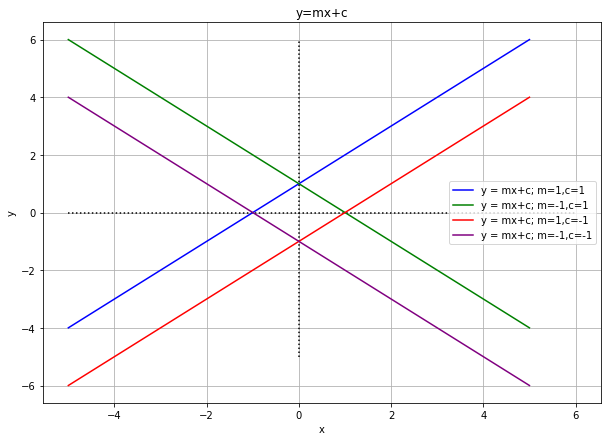

In [106]:
# Multiple lineplots in the same figure

plt.figure(figsize = (10,7))

plt.plot(l1['x'],l1['y'], label='y = mx+c; m=1,c=1',color='blue')
plt.plot(l2['x'],l2['y'],label='y = mx+c; m=-1,c=1',color='green')
plt.plot(l3['x'],l3['y'],label = 'y = mx+c; m=1,c=-1',color='red')
plt.plot(l4['x'],l4['y'],label='y = mx+c; m=-1,c=-1',color='purple')
plt.vlines(0, -5, 6, linestyles=':', colors="black")
plt.hlines(0, -5, 6, linestyles=':', colors="black")
plt.title("y=mx+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="center right") 
plt.grid()
plt.show()

## Histogram, Distribution, ECDF

In [43]:
df = pd.read_csv("tips.csv")

display(df.head())
# print(df.info())
# print(df.shape)
# display(df.describe())
# display(df.describe(include=['O']))

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Total_mins,Total_calls,Total_charges
0,128,25,1,no,no,yes,717.2,303,320.26
1,107,26,1,no,no,yes,625.2,332,313.64
2,137,0,0,no,no,no,539.4,333,224.89
3,84,0,2,no,yes,no,564.8,255,263.70
4,75,0,3,no,yes,no,512.0,359,238.99


## Histogram

<AxesSubplot:xlabel='total_bill', ylabel='Probability'>

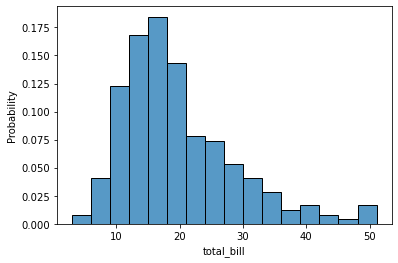

In [111]:
sns.histplot(x="total_bill", data=df, binwidth = 3, stat = 'probability')

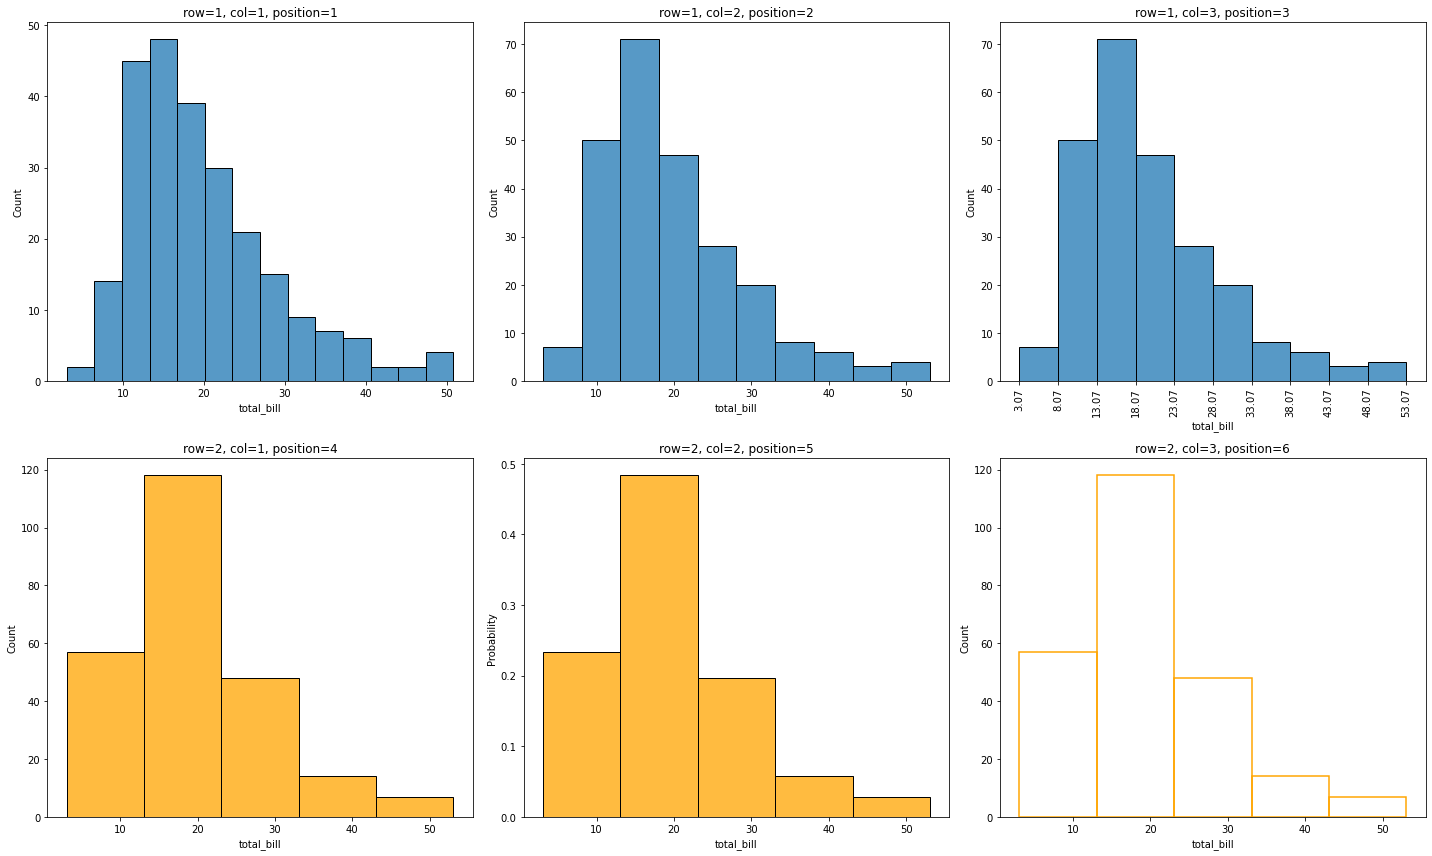

In [115]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(x="total_bill", data=df)
plt.title("row=1, col=1, position=1")

plt.subplot(2,3,2)
sns.histplot(x="total_bill", data=df, binwidth=5)
plt.title("row=1, col=2, position=2")

plt.subplot(2,3,3)
sns.histplot(x="total_bill", data=df, binwidth=5)
plt.xticks(np.arange(df["total_bill"].min(), df["total_bill"].max()+6, 5), rotation=90)
plt.title("row=1, col=3, position=3")

plt.subplot(2,3,4)
sns.histplot(x="total_bill", data=df, binwidth=10, color="orange")
plt.title("row=2, col=1, position=4")

plt.subplot(2,3,5)
sns.histplot(x="total_bill", data=df, binwidth=10, color="orange", stat="probability")
plt.title("row=2, col=2, position=5")

plt.subplot(2,3,6)
sns.histplot(x="total_bill", data=df, binwidth=10, color="orange", fill=False)
plt.title("row=2, col=3, position=6")

plt.tight_layout()
plt.show()

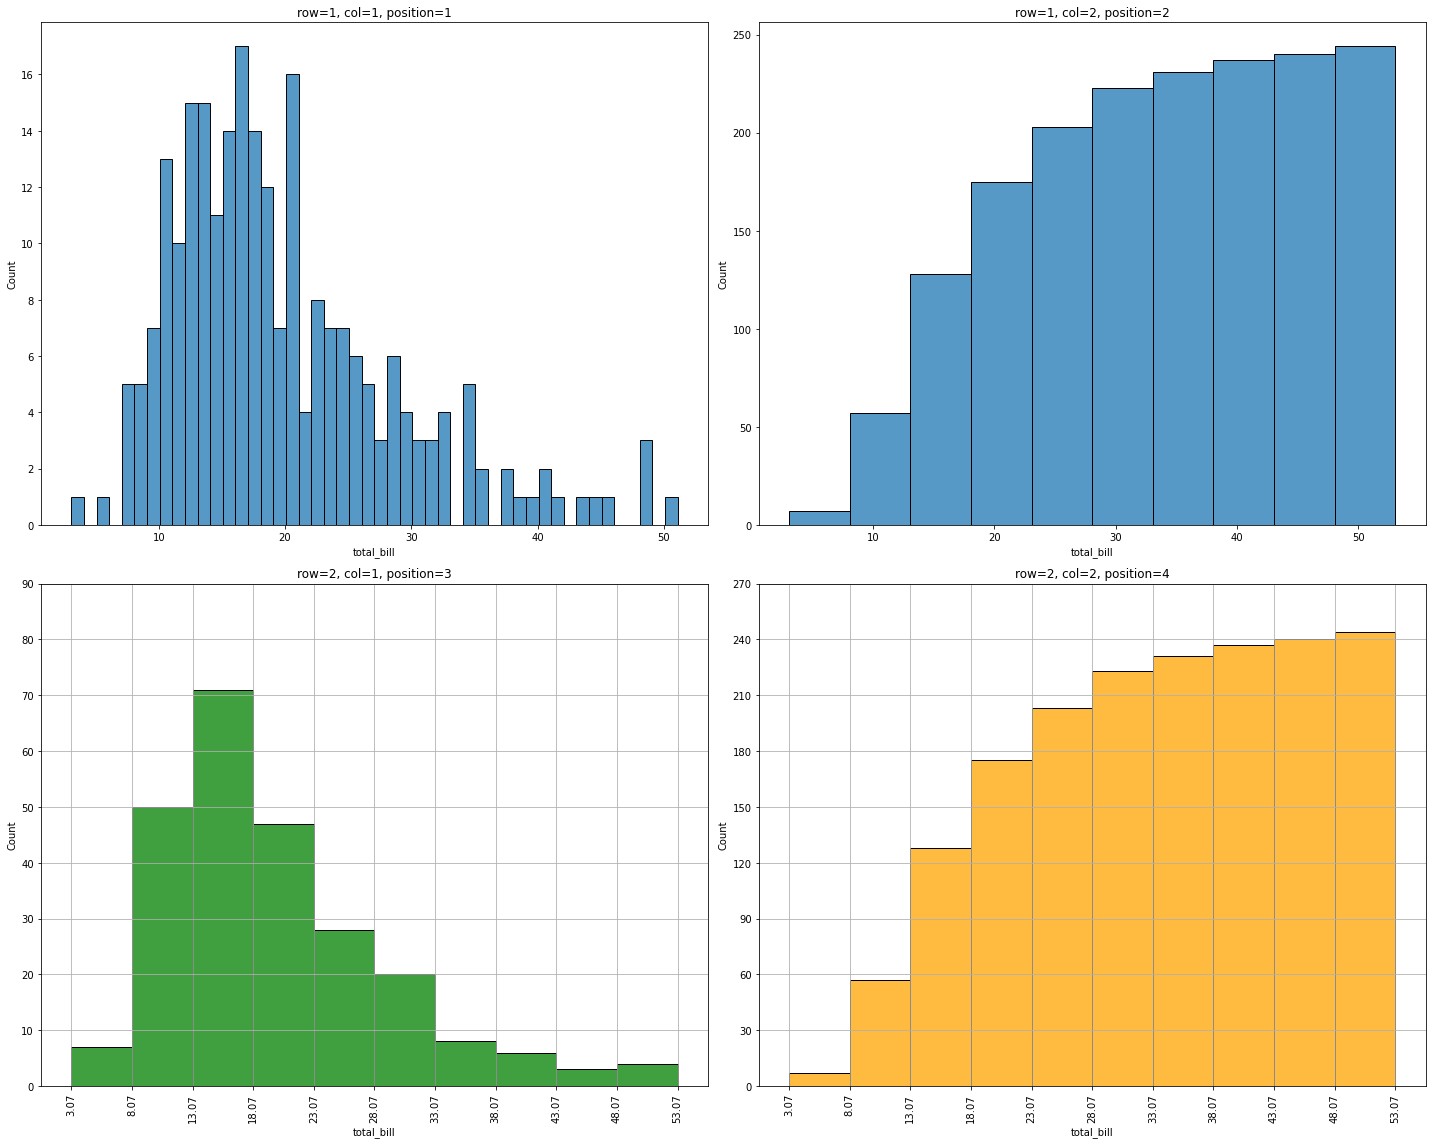

In [125]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.histplot(x="total_bill", data=df, binwidth=1)
plt.title("row=1, col=1, position=1")

plt.subplot(2,2,2)
sns.histplot(x="total_bill", data=df, binwidth=5, cumulative=True)
plt.title("row=1, col=2, position=2")

plt.subplot(2,2,3)
sns.histplot(x="total_bill", data=df, binwidth=5, color="green")
plt.xticks(np.arange(df["total_bill"].min(), df["total_bill"].max()+6, 5), rotation=90)
plt.grid()
plt.yticks(np.arange(0,100,10))
plt.title("row=2, col=1, position=3")

plt.subplot(2,2,4)
sns.histplot(x="total_bill", data=df, binwidth=5, cumulative=True, color="orange")
plt.yticks(np.arange(0,300,30))
plt.xticks(np.arange(df["total_bill"].min(), df["total_bill"].max()+6, 5), rotation=90)
plt.grid()
plt.title("row=2, col=2, position=4")

plt.tight_layout()
plt.show()

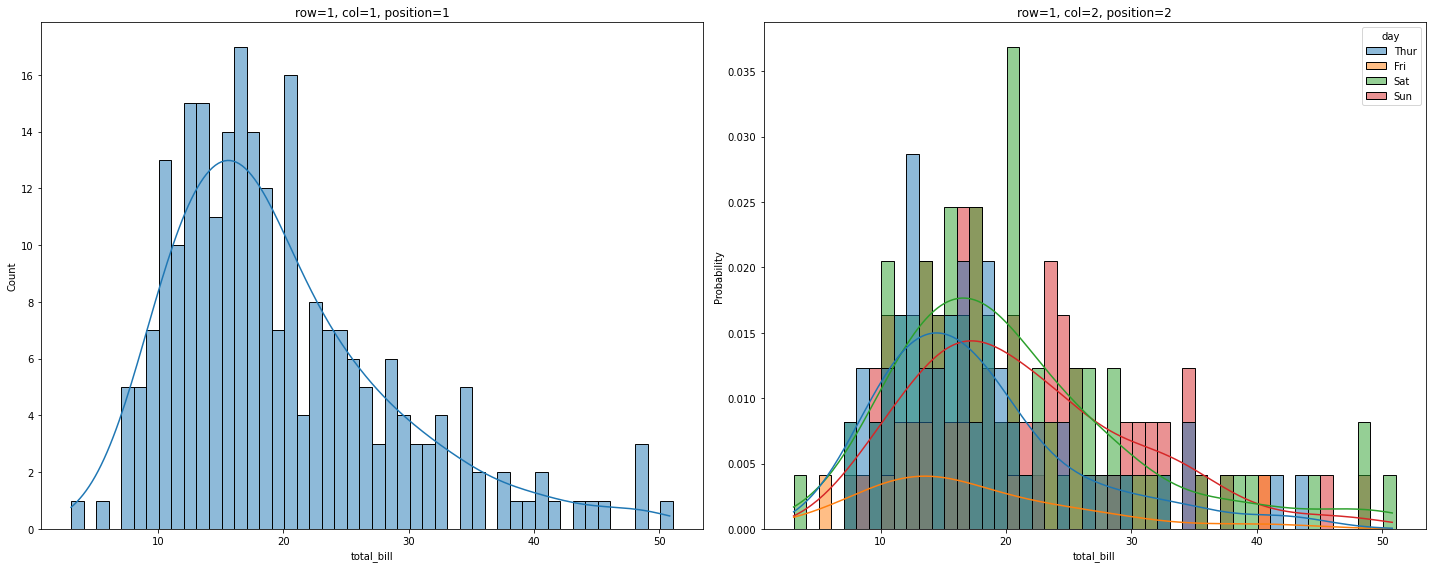

In [133]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.histplot(x="total_bill", data=df, binwidth=1, kde=True)
plt.title("row=1, col=1, position=1")

plt.subplot(1,2,2)
sns.histplot(x="total_bill", data=df, binwidth=1, kde=True, hue="day", stat = "probability")
plt.title("row=1, col=2, position=2")

plt.tight_layout()
plt.show()

In [135]:
df['total_bill'].sort_values()[1:2]

92    5.75
Name: total_bill, dtype: float64

### Distribution Plot
- https://pythonbasics.org/seaborn-distplot/#Distplot-example

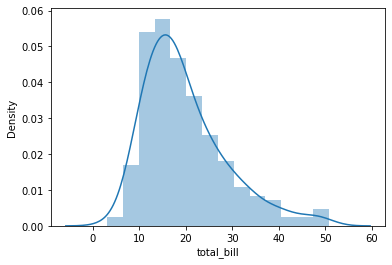

In [189]:
# distribution plot for total_bill column
ax = sns.distplot(df['total_bill'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

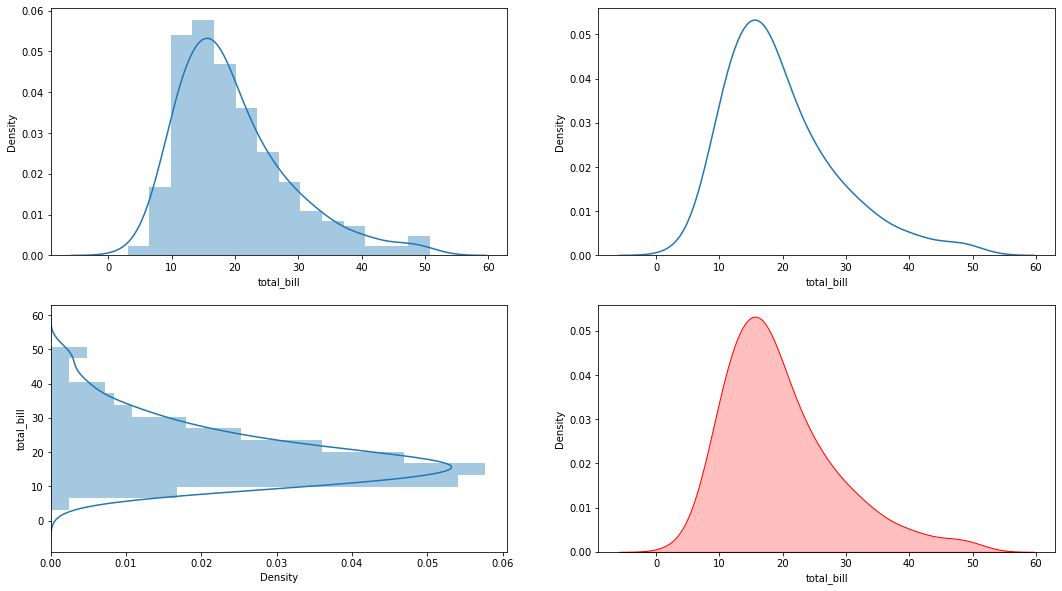

In [200]:
plt.figure(figsize=(18,10))


plt.subplot(2,2,1)
sns.distplot(df['total_bill'])

plt.subplot(2,2,2)
sns.distplot(df['total_bill'], rug=False, hist=False)

plt.subplot(2,2,3)
sns.distplot(df['total_bill'], vertical=True)

plt.subplot(2,2,4)
sns.kdeplot(df['total_bill'], shade=True, color="r")

plt.show()

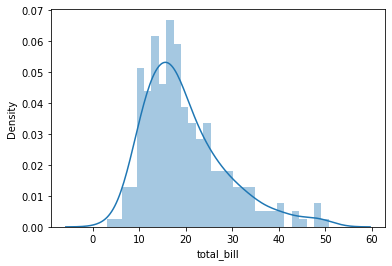

In [204]:
sns.distplot(df['total_bill'],bins=30,kde=True)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

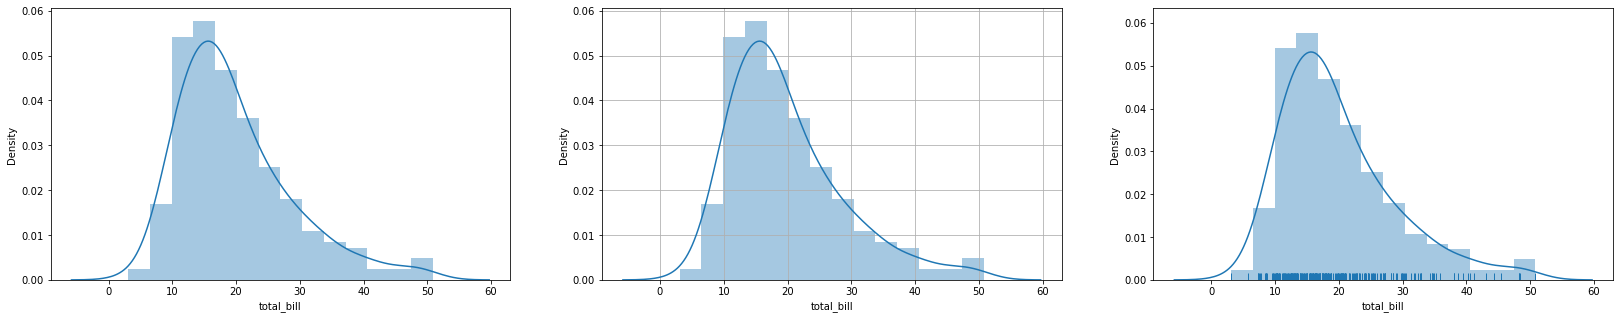

In [217]:
plt.figure(figsize=(28,5))

plt.subplot(1,3,1)
sns.distplot(df['total_bill'])

plt.subplot (1,3,2)
# plt.grid(True)
sns.distplot(df['total_bill'],rug=False)
plt.grid(True)

plt.subplot (1,3,3)
sns.distplot(df['total_bill'],rug=True)
plt.show()

## Box plot 

<AxesSubplot:ylabel='total_bill'>

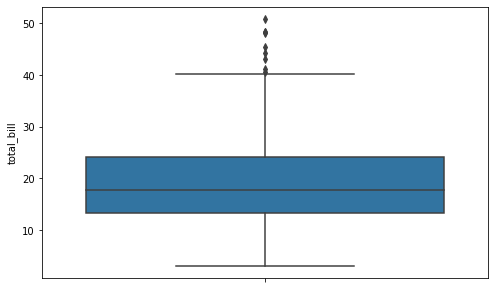

In [137]:
plt.figure(figsize=(8,5))
sns.boxplot(y = "total_bill", data=df, showfliers=True)

1. min, 
2. first quartile (25th percentile), 
3. median (50th percentile)
4. third quartile (75th percentile)
5. max
- range = max-min
- IQR (inter-quartile range) = third quartile - first quartile

In [157]:
# df.info()

In [156]:
num_cols = []
for col in df.select_dtypes(['float','int']):
    num_cols.append(col)
#     print(df[col].value_counts(), end='\n\n')
print(num_cols)

['total_bill', 'tip', 'size']


index =  0 position =  1 column name =  total_bill
index =  1 position =  2 column name =  tip
index =  2 position =  3 column name =  size


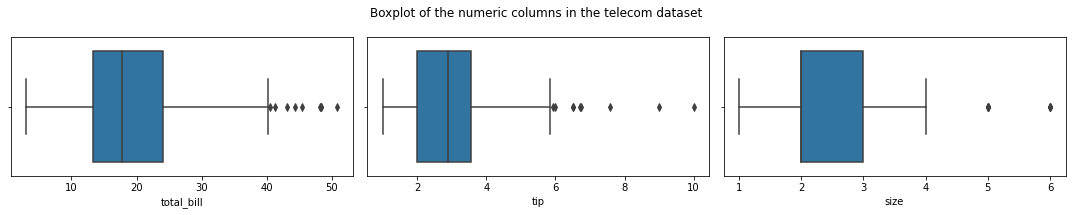

In [164]:
plt.figure(figsize=(15,3)) # width, height

for index in range(len(num_cols)):
    
    print("index = ", index, "position = ", index+1, "column name = ", num_cols[index])
    
    plt.subplot(1,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=True)

plt.suptitle("Boxplot of the numeric columns in the tips dataset")
plt.tight_layout()
plt.show()

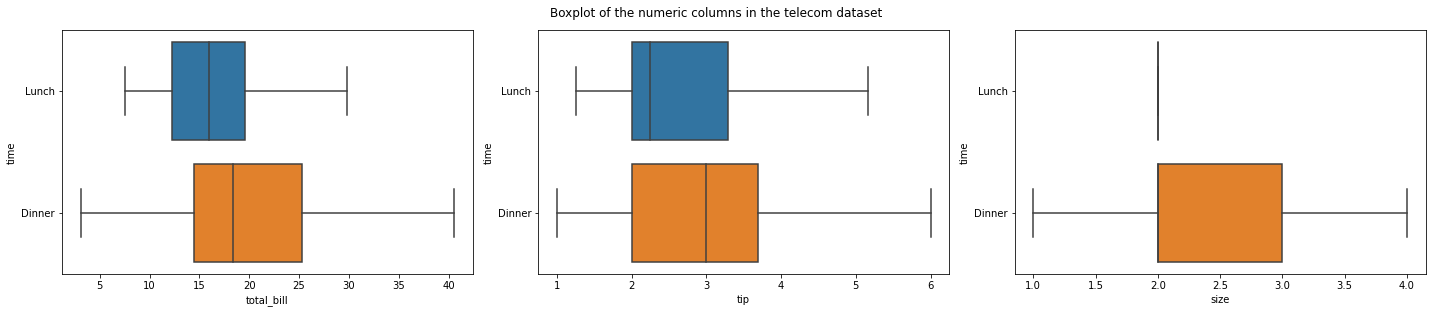

In [170]:
# Adding categorical features

plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False, y=df["time"])

plt.suptitle("Boxplot of the numeric columns in the tips dataset")
plt.tight_layout()
plt.show()

In [173]:
df[df['time']=='Lunch']['size'].value_counts()

2    52
4     5
3     5
6     3
1     2
5     1
Name: size, dtype: int64

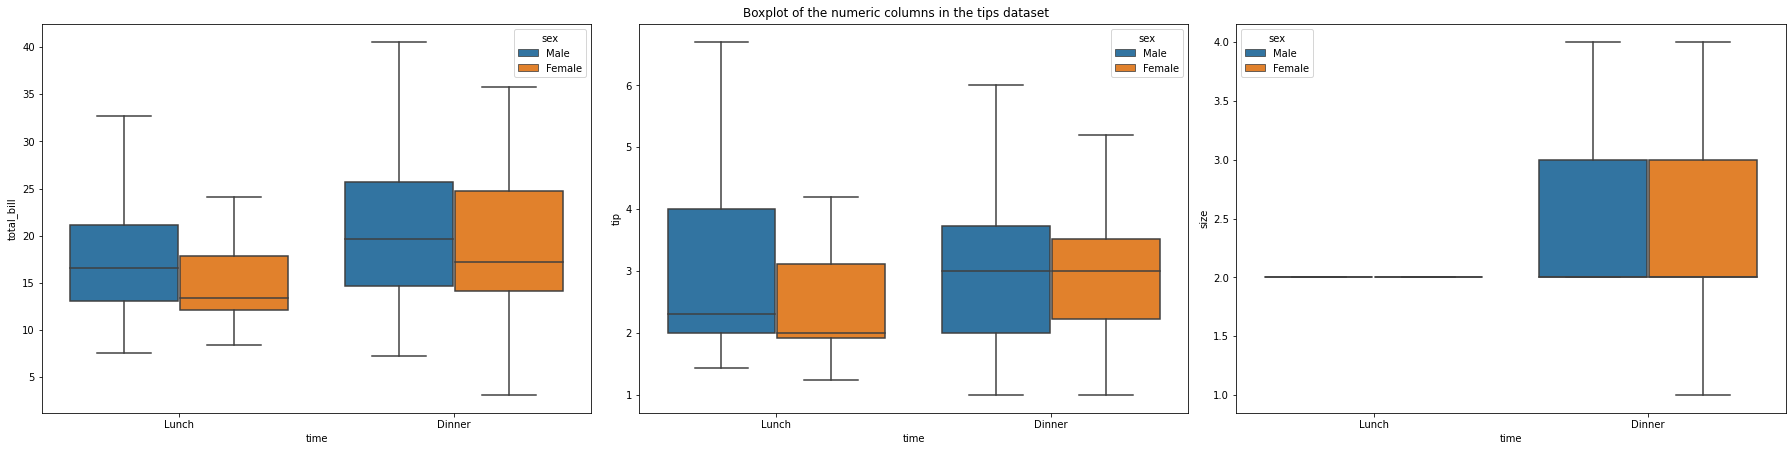

In [174]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=df[num_cols[index]], x=df["time"], hue=df["sex"], showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the tips dataset")
plt.tight_layout()
plt.show()

## Violin Plot

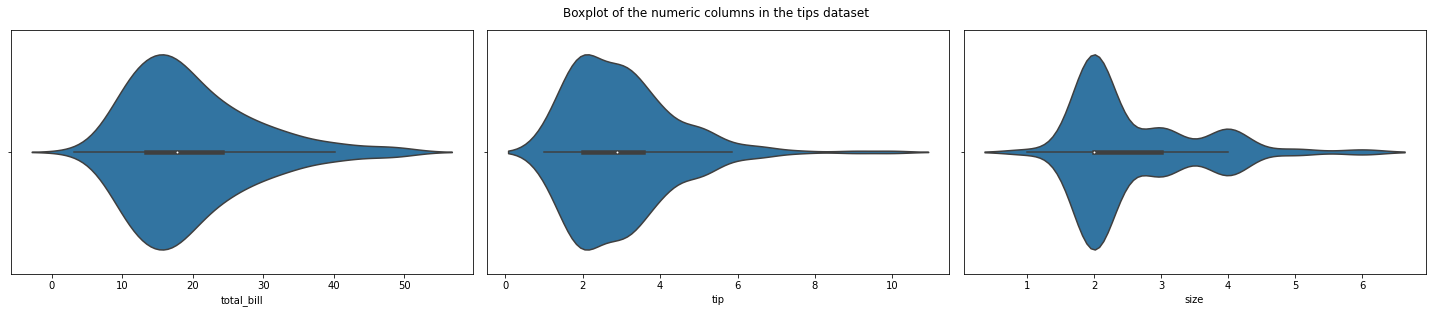

In [175]:
plt.figure(figsize=(20,8)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the tips dataset")
plt.tight_layout()
plt.show()

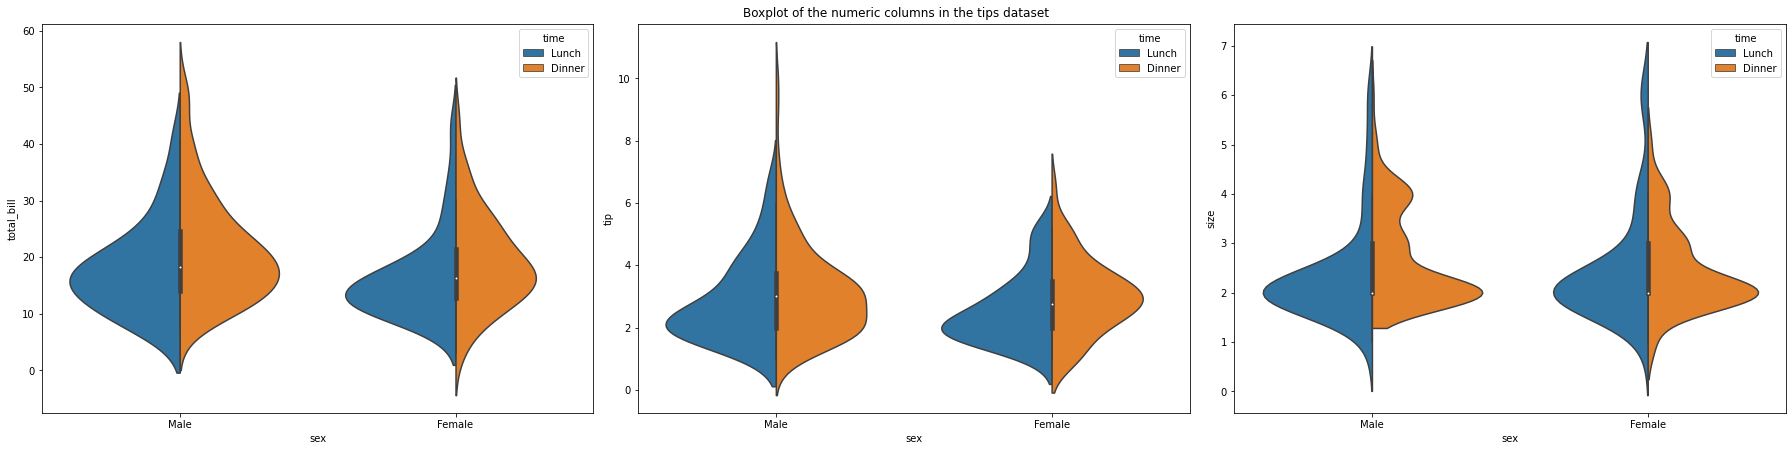

In [180]:
plt.figure(figsize=(25,12)) # width, height

for index in range(len(num_cols)): 
    plt.subplot(2,3,index+1)
    sns.violinplot(y=df[num_cols[index]], x=df['sex'], hue=df["time"], showfliers=False, split=True)

plt.suptitle("Boxplot of the numeric columns in the tips dataset")
plt.tight_layout()
plt.show()

### catplot in seaborn
- https://seaborn.pydata.org/generated/seaborn.catplot.html

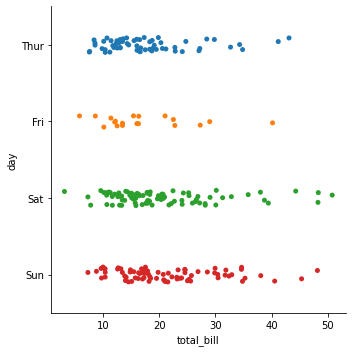

In [220]:
sns.catplot(data=df, x="total_bill", y="day")

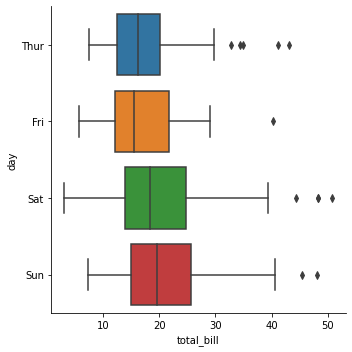

In [219]:
sns.catplot(data=df, x="total_bill", y="day", kind="box")

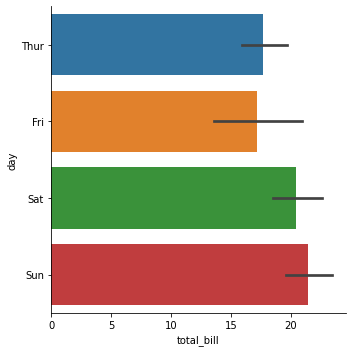

In [221]:
sns.catplot(data=df, x="total_bill", y="day", kind="bar")

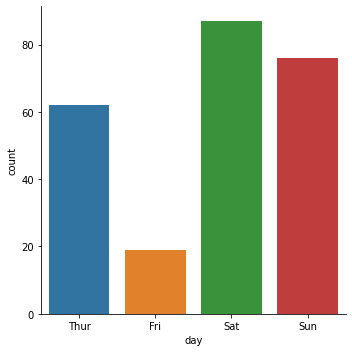

In [224]:
sns.catplot(data=df, x="day", kind="count")

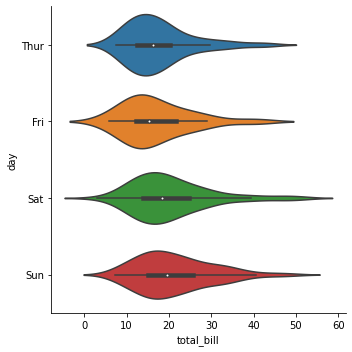

In [222]:
sns.catplot(data=df, x="total_bill", y="day", kind="violin")

## Time Series Plot

In [182]:
earthquakes = pd.read_csv("earthquakes.csv")

display(earthquakes.head())
display(earthquakes.tail())
print(earthquakes.info())
print(earthquakes.shape)

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0


,date,Year,earthquakes_per_year
94,1994-01-01,1994,15.0
95,1995-01-01,1995,25.0
96,1996-01-01,1996,22.0
97,1997-01-01,1997,20.0
98,1998-01-01,1998,16.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  99 non-null     object 
 1   Year                  99 non-null     int64  
 2   earthquakes_per_year  99 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB
None
(99, 3)


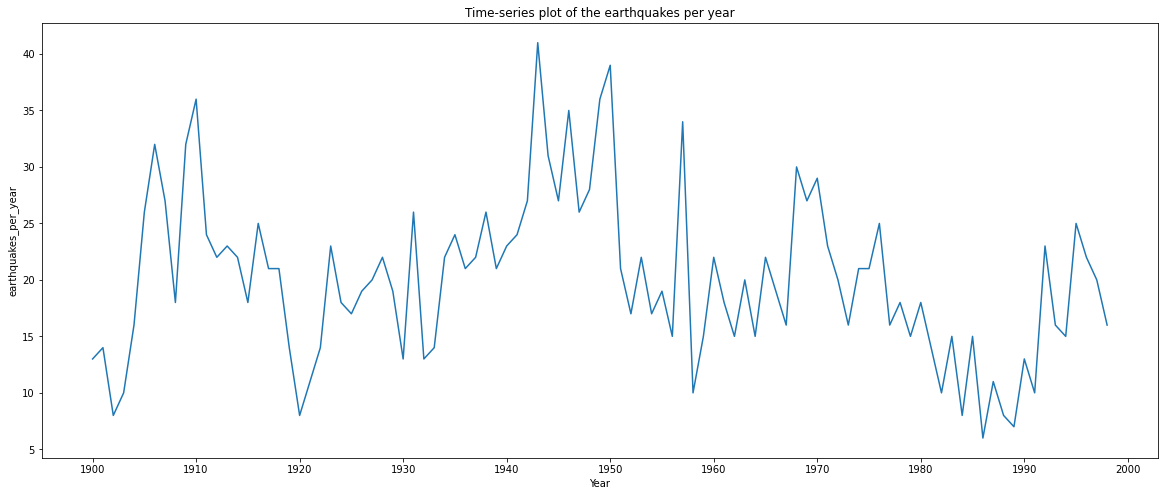

In [183]:
plt.figure(figsize=(20,8))
sns.lineplot(x="Year", y="earthquakes_per_year", data=earthquakes)

plt.title("Time-series plot of the earthquakes per year")
plt.xticks(np.arange(earthquakes["Year"].min(), earthquakes["Year"].max()+10, 10))
# plt.grid()
plt.show()

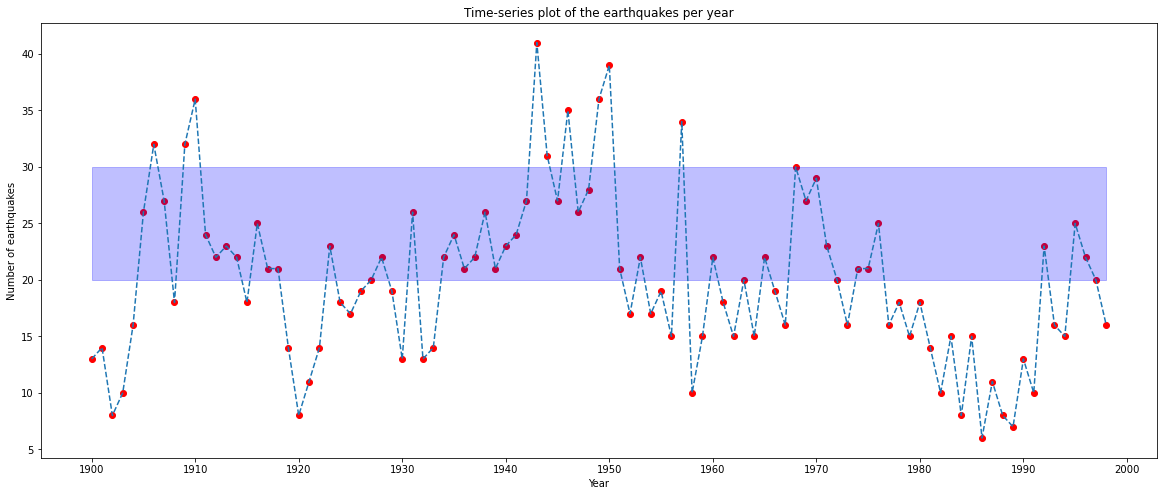

In [184]:
plt.figure(figsize=(20,8))
plt.plot(earthquakes["Year"], earthquakes["earthquakes_per_year"], linestyle="--")
plt.scatter(earthquakes["Year"], earthquakes["earthquakes_per_year"], marker="o", color="red")

plt.fill_between(earthquakes["Year"], 20, 30, color="b", alpha=0.25)

plt.title("Time-series plot of the earthquakes per year")
plt.xticks(np.arange(earthquakes["Year"].min(), earthquakes["Year"].max()+10, 10))
# plt.grid()

plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.show()

In [185]:
co2 = pd.read_csv("co2.csv")
co2['date'] = pd.to_datetime(co2['date'])

display(co2.head())
display(co2.tail())
display(co2.info())
print(co2.shape)

,date,CO2_ppm
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


,date,CO2_ppm
722,2018-05-01,411.24
723,2018-06-01,410.79
724,2018-07-01,408.71
725,2018-08-01,406.99
726,2018-09-01,405.51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     727 non-null    datetime64[ns]
 1   CO2_ppm  727 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


None

(727, 2)


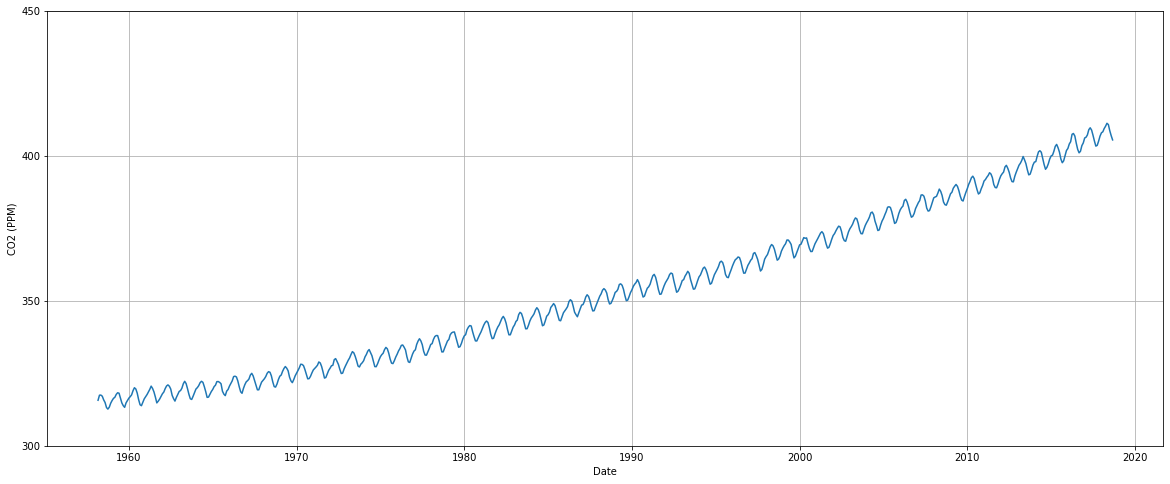

In [186]:
plt.figure(figsize=(20,8))
plt.plot(co2["date"], co2["CO2_ppm"])

plt.xlabel("Date")
plt.ylabel("CO2 (PPM)")
plt.yticks(np.arange(300, 500, 50))
plt.grid()
plt.show()